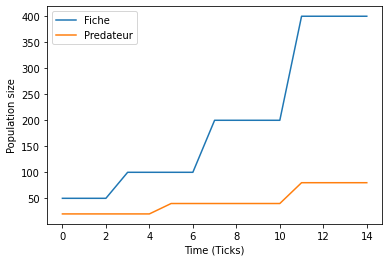

In [3]:
# Define the width and height of the grid
GRID_WIDTH = 10  # largeur de la grille
GRID_HEIGHT = 10  # hauteur de la grille

# Other constants
WATER_QUALITY = 0.7  # qualité de l'eau (entre 0 et 1)
TEMPERATURE = 25  # température de l'eau en degrés Celsius
REPRODUCTION_CHANCE = 0.1  # chance de reproduction pour les poissons (entre 0 et 1)
MAX_AGE = 10  # âge maximal d'un poisson en années
MAX_HUNGER = 3  # niveau de faim maximal d'un prédateur en jours

class Fish:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.food = 0  # quantité de nourriture que le poisson a mangée
        self.age = 0  # âge du poisson

    def move(self, available_food):
        if available_food < 7.2:  # pas assez de nourriture pour survivre
            return
        self.age += 1
        self.food -= 0.1
        new_x = self.x + random.randint(-1, 1)
        new_y = self.y + random.randint(-1, 1)
        if new_x < 0:
            new_x = 0
        elif new_x >= GRID_WIDTH:
            new_x = GRID_WIDTH - 1
        if new_y < 0:
            new_y = 0
        elif new_y >= GRID_HEIGHT:
            new_y = GRID_HEIGHT - 1

        self.x = new_x
        self.y = new_y
        self.food += available_food - 7.2  # nourriture restante après mouvement

    def reproduce(self):
        if self.age < 2 or random.random() > REPRODUCTION_CHANCE or self.food < 5:  # conditions de reproduction
            return None
        new_x = self.x + random.randint(-1, 1)
        new_y = self.y + random.randint(-1, 1)
        if new_x < 0:
            new_x = 0
        elif new_x >= GRID_WIDTH:
            new_x = GRID_WIDTH - 1
        if new_y < 0:
            new_y = 0
        elif new_y >= GRID_HEIGHT:
            new_y = GRID_HEIGHT - 1
        new_fish = Fish(new_x, new_y)
        new_fish.food = self.food / 2
        self.food /= 2
        return new_fish
    def die(self):
        if self.age > MAX_AGE or self.food < 0:
            return True
        return False

class Predator:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.hunger = 0  # niveau de faim du prédateur
        self.age = 0  # âge du prédateur

    def move(self):
        self.age += 1
        self.hunger += 1
        new_x = self.x + random.randint(-1, 1)
        new_y = self.y + random.randint(-1, 1)
        if new_x < 0:
            new_x = 0
        elif new_x >= GRID_WIDTH:
            new_x = GRID_WIDTH - 1
        if new_y < 0:
            new_y = 0
        elif new_y >= GRID_HEIGHT:
            new_y = GRID_HEIGHT - 1

        self.x = new_x
        self.y = new_y

    def eat(self, prey_list):
        for prey in prey_list:
            if abs(prey.x - self.x) <= 1 and abs(prey.y - self.y) <= 1:
                prey_list.remove(prey)
                self.hunger = 0
                return
        self.hunger += 1
    def reproduce(self):
        if self.age < 3 or self.hunger > MAX_HUNGER or random.random() > REPRODUCTION_CHANCE:
            return None
        new_x = self.x + random.randint(-1, 1)
        new_y = self.y + random.randint(-1, 1)
        if new_x < 0:
            new_x = 0
        elif new_x >= GRID_WIDTH:
            new_x = GRID_WIDTH - 1
        if new_y < 0:
            new_y = 0
        elif new_y >= GRID_HEIGHT:
            new_y = GRID_HEIGHT - 1
        new_predator = Predator(new_x, new_y)
        self.hunger /= 2
        new_predator.hunger = self.hunger
        self.hunger /= 2
        return new_predator    
    def die(self):
        if self.age > MAX_AGE or self.hunger > MAX_HUNGER:
            return True
        return False

import matplotlib.pyplot as plt

class Fiche:
    population_size = 50
    tick_counter = 0

    @classmethod
    def reproduce(cls):
        cls.population_size *= 2

    @classmethod
    def die(cls):
        cls.population_size //= 2

class Predateur:
    population_size = 20
    tick_counter = 0

    @classmethod
    def reproduce(cls):
        cls.population_size *= 2

    @classmethod
    def die(cls):
        cls.population_size //= 2

def simulate_ecosystem(nb_ticks):
    fiche_population = []
    predateur_population = []

    for i in range(nb_ticks):
        # Increment the tick counter for each organism
        Fiche.tick_counter += 1
        Predateur.tick_counter += 1

        # Reproduction
        if Fiche.tick_counter >= 4:
            Fiche.reproduce()
            Fiche.tick_counter = 0

        if Predateur.tick_counter >= 6:
            Predateur.reproduce()
            Predateur.tick_counter = 0

        # Death
        if Predateur.population_size >= Fiche.population_size:
            Predateur.die()

        if Fiche.population_size == 0:
            break

        # Update the population lists
        fiche_population.append(Fiche.population_size)
        predateur_population.append(Predateur.population_size)

    # Plot the population dynamics over time
    plt.plot(fiche_population, label="Fiche")
    plt.plot(predateur_population, label="Predateur")
    plt.legend()
    plt.xlabel("Time (Ticks)")
    plt.ylabel("Population size")
    plt.show()
simulate_ecosystem(15)